### Predict tomorrows stock price based on previous 60 days Open details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../datasets/Google_Stock_Price_Train.csv')
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


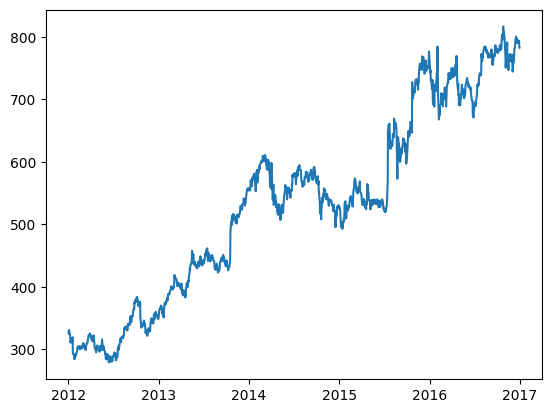

In [4]:
plt.plot(pd.to_datetime(df['Date']),df['Open'])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[['Open']])
X_scaled.shape

(1258, 1)

In [7]:
X_train = []
y_train = []
for i in range(1198):
    row = X_scaled[i:60+i,0]
    y = X_scaled[60+i,0]
    X_train.append(row)
    y_train.append(y)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape(1198,60,1)
X_train.shape, y_train.shape

((1198, 60, 1), (1198,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [9]:
model = Sequential()
model.add(LSTM(30,return_sequences=True,input_shape=(60, 1)))
model.add(LSTM(30,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error')
model.fit(X_train,y_train,epochs = 20, batch_size = 32)

Epoch 1/20


C:\Users\Jay Sunil Sonawane\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0200
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0033
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0027
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0023
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0021
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0019
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0020
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0019
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018    
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0017
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015    
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0014
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0014
Epoch 1

# Make Predictions

In [11]:
df_test = pd.read_csv('../../datasets/Google_Stock_Price_Test.csv')
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [13]:
X_test_scaled = scaler.transform(df_test[['Open']])
X_test_scaled.shape

(20, 1)

In [14]:
temp = np.vstack([X_scaled[-60:],X_test_scaled])
temp.shape

(80, 1)

In [15]:
X_test = []
for i in range(20):
    row = temp[i:60+i,0]
    X_test.append(row)
X_test = np.array(X_test)
X_test = X_test.reshape(20,60,1)
X_test.shape

(20, 60, 1)

In [16]:
yp = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


In [17]:
yp

array([[0.9765481 ],
       [0.97363603],
       [0.9714804 ],
       [0.96964973],
       [0.96929014],
       [0.9712467 ],
       [0.97470653],
       [0.97853243],
       [0.98258936],
       [0.98654926],
       [0.9901272 ],
       [0.9930636 ],
       [0.9953088 ],
       [0.99717945],
       [0.998723  ],
       [1.0017785 ],
       [1.0064472 ],
       [1.0127972 ],
       [1.019395  ],
       [1.023305  ]], dtype=float32)

In [18]:
yp = scaler.inverse_transform(yp)

In [19]:
yp

array([[804.0732 ],
       [802.50775],
       [801.349  ],
       [800.3649 ],
       [800.1716 ],
       [801.2234 ],
       [803.0832 ],
       [805.1399 ],
       [807.32074],
       [809.4494 ],
       [811.37274],
       [812.9513 ],
       [814.1582 ],
       [815.1638 ],
       [815.9935 ],
       [817.636  ],
       [820.14575],
       [823.55927],
       [827.10596],
       [829.2078 ]], dtype=float32)

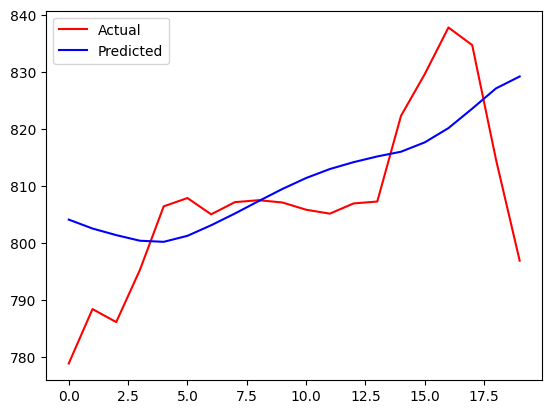

In [20]:
plt.plot(df_test['Open'],c='red',label='Actual')
plt.plot(yp,c='blue',label='Predicted')
plt.legend()